In [1]:
#For Kaggle
#date=''

#For WL data
source='WL'
date='20241118'

saveImage=False

print('done')

done


In [2]:
import sys
import os
from importlib import reload
fpath = os.path.join('..//scripts')
sys.path.append(fpath)

import warnings
warnings.filterwarnings('ignore')

#loading internal scripts
import frauddetection as fd
import sourcedata as sd
import dataimport as di
import result as resultMd
import sampling as sp
reload(fd)
reload(sd)
reload(di)
reload(resultMd)
reload(sp)

print('done')

done


In [3]:
import pandas as pd

dfTrx = pd.read_csv('../data/cleaned/'+source+'export'+date+'.csv')
dfTrx.head(5)

,db_uuid,trx_date_time,term_mcc,term_country,mcd_fraud_score,vaa_score,TRX_3D_SECURED,trx_accepted,trx_cnp,card_pan_id,...,clusterCardHolder_cluster4,clusterMerchant_M0,clusterMerchant_M1,clusterMerchant_M2,clusterMerchant_M3,clusterMerchant_UNKNOWN,nbPreviousTrx,previousTrxAmountSumLog,trx_amount_log10,distancePrevTrx
0,A3DEF420A53B11EFABA49D2778D26ADA,2024-11-18 00:25:43,5499,NLD,289.000000,26.258093,0,1,1,A4BF631BFD796F0D7D9A714E5AD1F5D26E8D70A4999F30...,...,0,1,0,0,0,0,0,0.0,1.763353,1.100000
1,31BFAC76A53C11EFABA49D2778D26ADA,2024-11-18 00:30:44,4215,BEL,148.000000,26.258093,1,1,1,6048F88F23C4D90D50615342B2445A0CD680E3D102E56C...,...,0,0,0,0,1,0,0,0.0,1.330617,0.768071
2,75A6059CA53811EFA6F9EF55A8E51A55,2024-11-18 00:03:02,5968,FRA,363.000000,26.258093,0,1,1,6081849BC94C237C841CDC43E06CAB46A25F9BE5DE3DF3...,...,0,1,0,0,0,0,0,0.0,0.902547,1.100000
3,C5DEFDAAA53A11EFAAA0DF784AB5695E,2024-11-18 00:09:37,5812,USA,225.222235,26.258093,0,1,0,60E1D8C417CDFDE242B10454048AEEF15CF15C39251BE1...,...,0,0,0,0,0,1,0,0.0,1.563837,1.000000
4,D4F9F3CCA53E11EFAB1F43D36D9BDFD5,2024-11-18 00:48:47,5942,LUX,225.222235,30.000000,0,1,0,AFEEC568C21C0640F97EACED2F4D9B25537D94CE391457...,...,1,1,0,0,0,0,0,0.0,1.546049,1.100000


# Sampling in Python

In [5]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

predictors = fd.getPredictors(dfTrx)
TEST_SIZE = 0.20 # test size using_train_test_split
RANDOM_STATE = 0
x_train0, x_test, y_train0, y_test = train_test_split(dfTrx[predictors], dfTrx['Class'], test_size = TEST_SIZE, 
                                                        stratify= dfTrx['Class'],
                                                        random_state = RANDOM_STATE)

#scaler=StandardScaler()
#x_train= scaler.fit_transform(x_train0)
#x_test= scaler.transform(x_test)
x_train= x_train0.copy()
x_test = x_test.copy()



# Over sampling
* randomOverSampling
* smoteOverSampling

# Under sampling
* randomUnderSampling
* NearMiss
* EditedNearestNeighboursUnderSampling (very slow)
* NeighbourhoodCleaningRuleUnderSampling
* tomekLinks (very slow 33 minutes)

# Combined approach
* Combined random over and underSampling


# Over sampling

Sampling shape before (847879, 39)
fraud rate before 0.00123 
Duration (in s)  0.405913
fraud rate after 0.00614 
shape after (852039, 39)


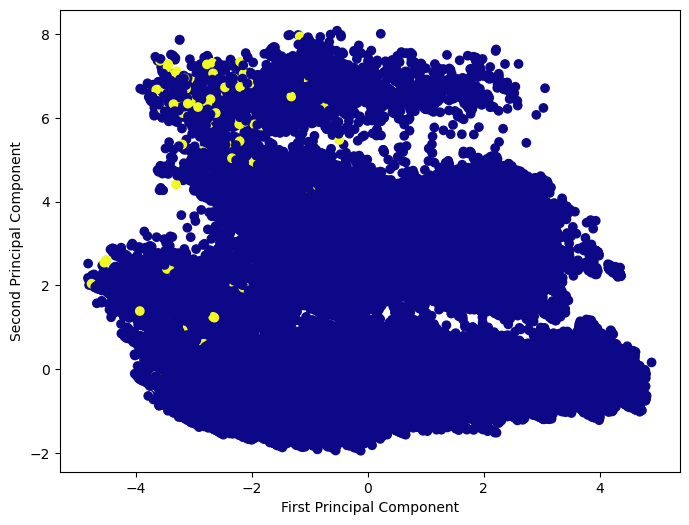

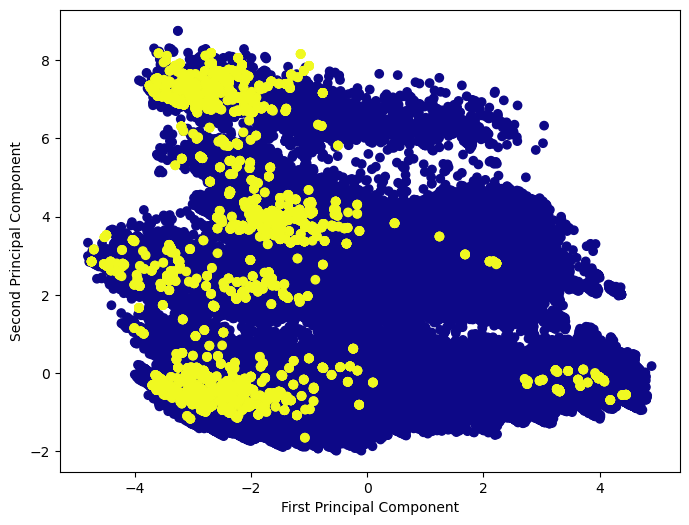

In [8]:
x_train, y_train = sp.randomOverSampling(x_train0, y_train0,rateOverSampling=5)
sp.draw2DPCAScaterPlot(x_train0,y_train0)
sp.draw2DPCAScaterPlot(x_train,y_train)

Sampling shape before (847879, 39)
fraud rate before  0.00123 
Duration (in s)  1.526922
fraud rate after 0.00614 
shape after (852039, 39)


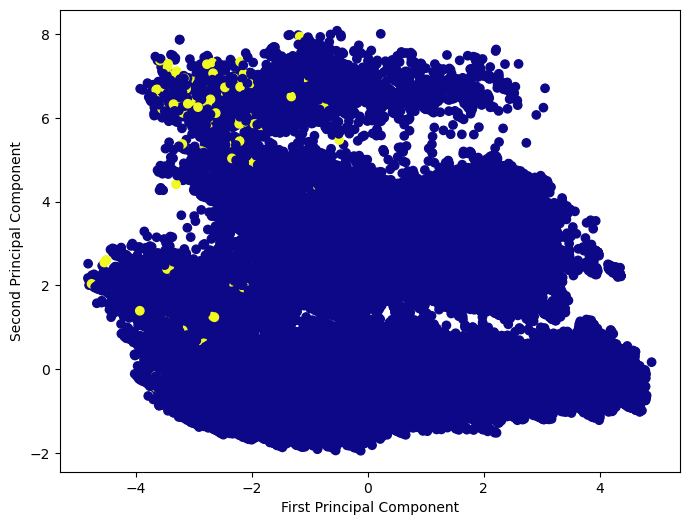

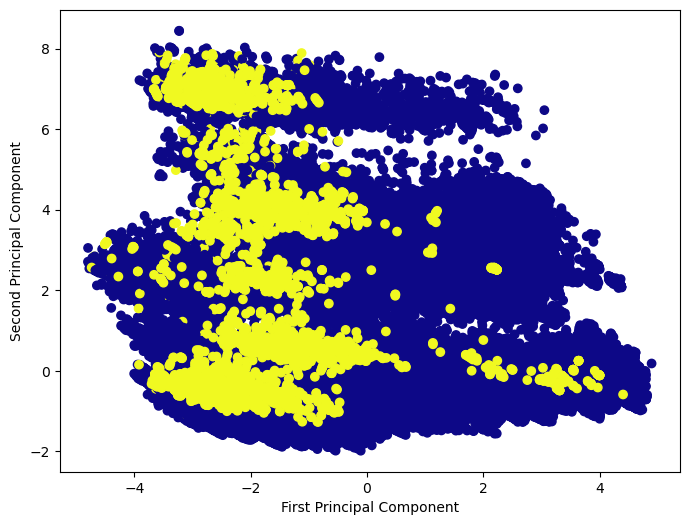

In [9]:

x_train, y_train = sp.smoteOverSampling(x_train0, y_train0,rateOverSampling=5)

sp.draw2DPCAScaterPlot(x_train0,y_train0)
sp.draw2DPCAScaterPlot(x_train,y_train)


# Under sampling

Sampling shape before (847879, 39)
fraud rate before  0.00123 
Duration (in s)  0.301573
fraud rate after 0.01000 
shape after (105040, 39)


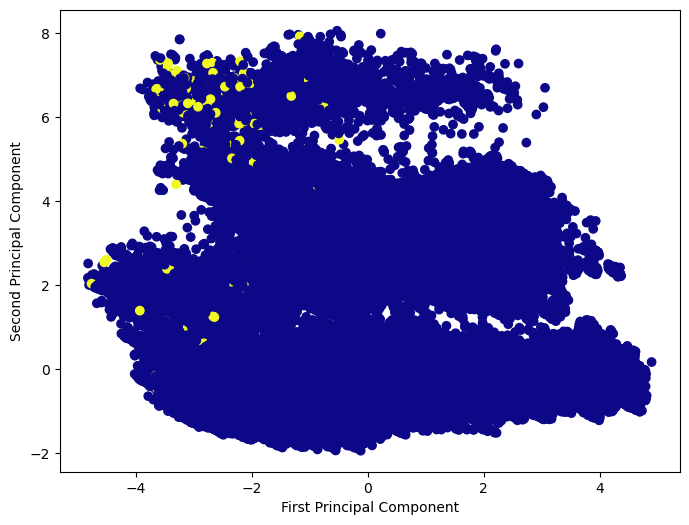

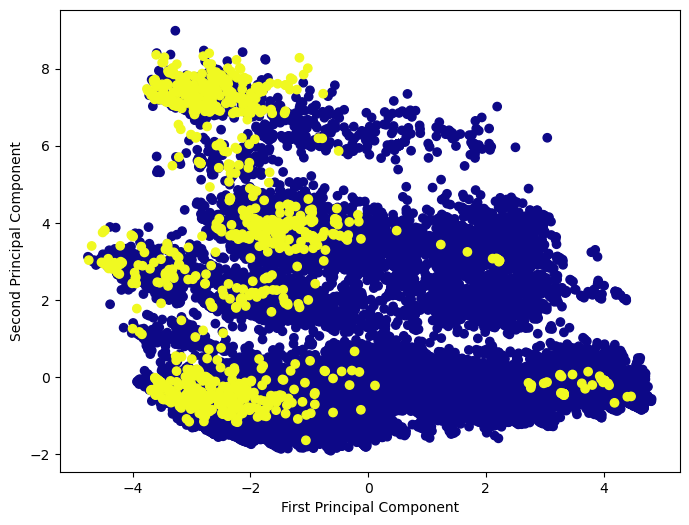

In [11]:
x_train, y_train = sp.randomUnderSampling(x_train0, y_train0,rate=1/100)
sp.draw2DPCAScaterPlot(x_train0,y_train0)
sp.draw2DPCAScaterPlot(x_train,y_train)

Sampling shape before (847879, 39)
fraud rate before  0.00123 
Duration (in s)  3.509934
fraud rate after 0.01000 
shape after (105040, 39)


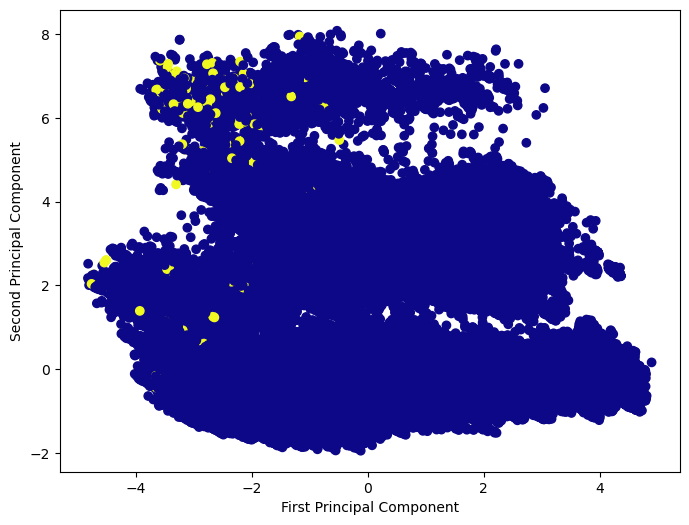

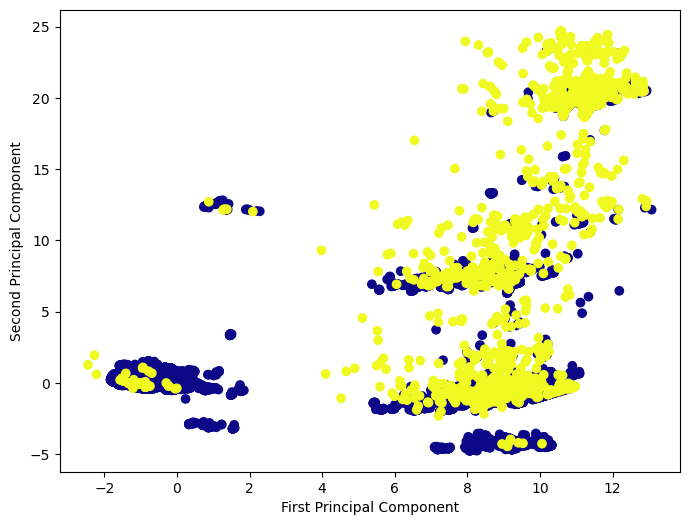

In [12]:
x_train, y_train = sp.nearMissV1UnderSampling(x_train0, y_train0,rate=1/100)

sp.draw2DPCAScaterPlot(x_train0,y_train0)
sp.draw2DPCAScaterPlot(x_train,y_train)


Sampling shape before (847879, 39)
fraud rate before  0.00123 
Duration (in s)  48.273047
fraud rate after 0.01000 
shape after (105040, 39)


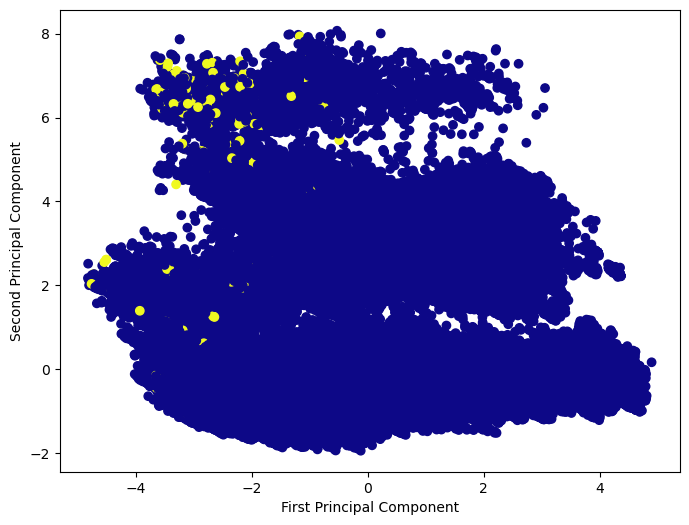

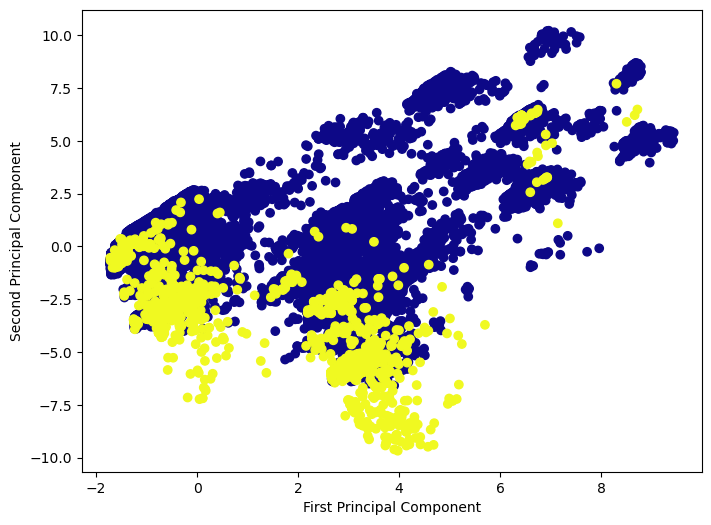

In [13]:
x_train, y_train = sp.nearMissV2UnderSampling(x_train0, y_train0,rate=1/100)

sp.draw2DPCAScaterPlot(x_train0,y_train0)
sp.draw2DPCAScaterPlot(x_train,y_train)

Sampling shape before (847879, 39)
fraud rate before  0.00123 
Duration (in s)  2.370841
fraud rate after 0.38864 
shape after (3716, 39)


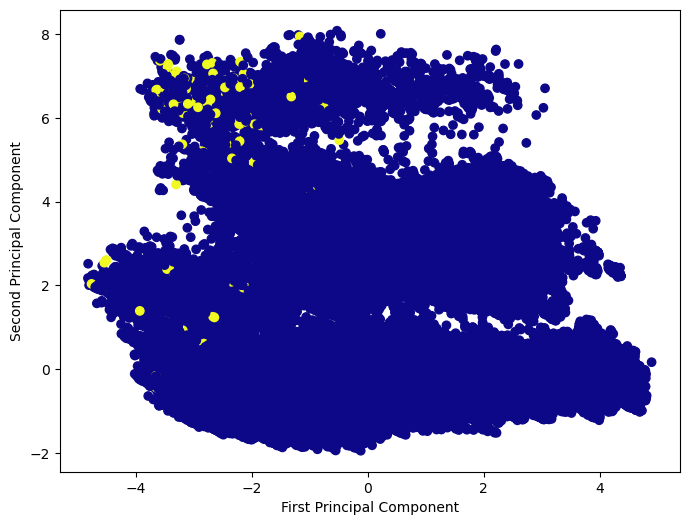

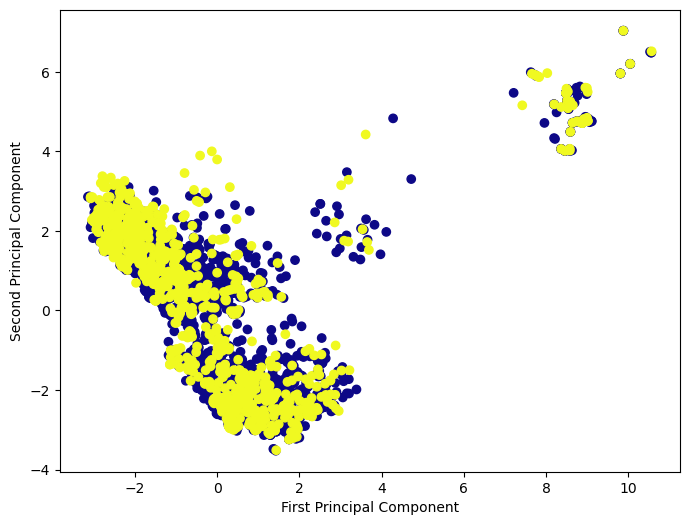

In [14]:
x_train, y_train = sp.nearMissV3UnderSampling(x_train0, y_train0,rate=1/100)

sp.draw2DPCAScaterPlot(x_train0,y_train0)
sp.draw2DPCAScaterPlot(x_train,y_train)

Sampling shape before (847879, 39)
fraud rate before  0.00123 
Duration (in s)  1997.621463
fraud rate after 0.00123 
shape after (847533, 39)


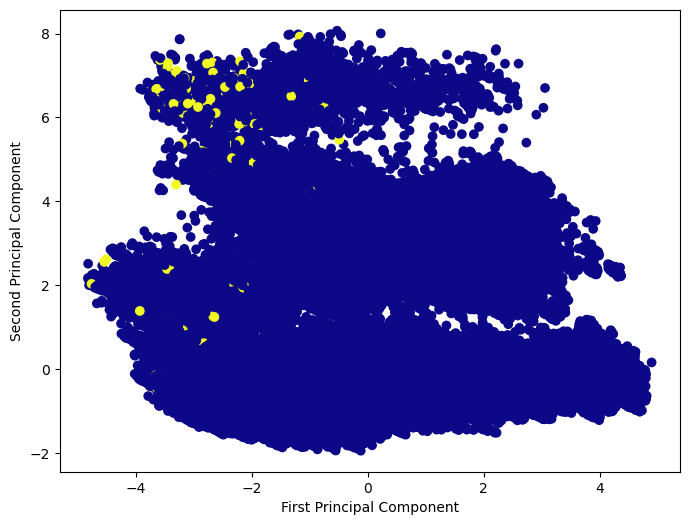

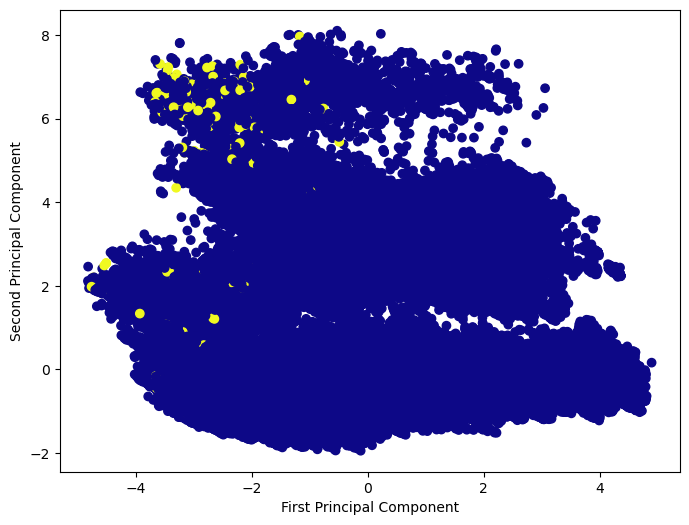

In [15]:


x_train, y_train = sp.tomekLinksUnderSampling(x_train0, y_train0)

sp.draw2DPCAScaterPlot(x_train0,y_train0)
sp.draw2DPCAScaterPlot(x_train,y_train)

In [ ]:


x_train, y_train = sp.neighbourhoodCleaningRuleUnderSampling(x_train0, y_train0,rate=1/100)

sp.draw2DPCAScaterPlot(x_train0,y_train0)
sp.draw2DPCAScaterPlot(x_train,y_train)

Sampling shape before (847879, 39)
fraud rate before  0.00123 


# combined approach

In [ ]:
x_train, y_train = sp.randomOverUnderSampling(x_train0, y_train0)
sp.draw2DPCAScaterPlot(x_train0,y_train0)
sp.draw2DPCAScaterPlot(x_train,y_train)

# combined version  EditedNearestNeighbours RandomUnderSampler

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from datetime import datetime
from imblearn.under_sampling import OneSidedSelection
from sklearn.model_selection import train_test_split

then= datetime.now()
undersample = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
print("1-x_train.shape",x_train0.shape)
now = datetime.now()
print(datetime.now())
x_train, y_train = undersample.fit_resample(x_train0, y_train0)
print(datetime.now())
print("2-x_train.shape",x_train.shape)
duration= now - then
duration_in_s = duration.total_seconds()
print("1-Duration ",duration_in_s)

modelClf = KNeighborsClassifier()
modelClf.fit(x_train, y_train)
predsTrain = modelClf.predict(x_train)
predsTest = modelClf.predict(x_test)

now = datetime.now()
duration= now - then
duration_in_s = duration.total_seconds()
print("2-Duration ",duration_in_s)

#resultMd.update_time_response_result('05-sklearn.neighbors','KNeighborsClassifier','2-DownSampling', duration_in_s)
f1,mcc,roc=fd.print_scores(y_test, predsTest,'all')
#resultMd.update_performance_test_result('05-sklearn.neighbors','KNeighborsClassifier','2-DownSampling', f1,mcc,roc)

fd.print_scores(y_train, predsTrain,'f1', False)
fd.print_scores(y_test, predsTest,'f1')
fd.show_importance(modelClf, predictors)
fd.show_confusion_matrix(y_test, predsTest)
fd.show_prediction_graph(modelClf, x_test,y_test)

